In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [281]:
# Generate datapoints
l = 300
dim = 1
d = np.random.rand(l, dim) * 20 - np.array([[10] for _ in range(l)])
noise = 0.1 # sigma^2_y
def augment_d(d): # Augments dataset with an intercept column
    return np.concatenate((d.T, [np.ones(len(d))]), axis=0).T
eps = np.random.randn(l) * noise

true_weights = np.array([-9, 15]) # Underlying data-generating weights
y = augment_d(d) @ true_weights + eps

In [278]:
mu_prior = np.array([19, 2])
cov_prior = np.array([[20, 0.3], [0.3, -3]]) * 20

def posterior_distribution(theta, d, y):
    mu = cov_prior @ d.T @ np.linalg.inv(d @ cov_prior @ d.T + noise * np.eye(l)) @ y
    cov = cov_prior - cov_prior @ d.T @ np.linalg.inv(d @ cov_prior @ d.T + noise * np.eye(l)) @ d @ cov_prior
    return stats.multivariate_normal.pdf(theta, mean=mu, cov=cov)
def get_theta(d, y, mu_prior=mu_prior, cov_prior=cov_prior):
    mu = cov_prior @ d.T @ np.linalg.inv(d @ cov_prior @ d.T + noise * np.eye(l)) @ y
    cov = cov_prior - cov_prior @ d.T @ np.linalg.inv(d @ cov_prior @ d.T + noise * np.eye(l)) @ d @ cov_prior
    return mu, cov

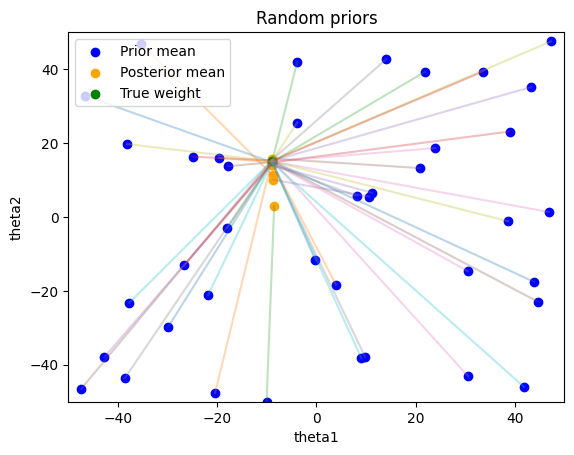

In [279]:
N = 40
mu_prior_samples = np.random.rand(N, 2)*100 - np.array([50, 50])
cov_prior_samples = np.random.rand(N, 2, 2)
#cov_prior_samples = np.array([np.eye(2, 2) for _ in range(N)])
#mus = np.array([get_theta(augment_d(d), y, mu_prior=mu_prior, cov_prior=cov_prior)[0] for mu_prior in mu_prior_samples])
mus = np.array([get_theta(augment_d(d), y, mu_prior=mu_prior, cov_prior=cov_prior)[0] for mu_prior, cov_prior in zip(mu_prior_samples, cov_prior_samples)])

#plt.scatter([(eigen[0], eigen[1]) for eigen in np.linalg.eigen(covs)])
for prior, posterior in zip(mu_prior_samples, mus):
    plt.plot([prior[0], posterior[0]], [prior[1], posterior[1]], alpha=0.3)
plt.scatter(mu_prior_samples[:, 0], mu_prior_samples[:, 1], color="blue", label="Prior mean")
plt.scatter(mus[:, 0], mus[:, 1], color="orange", label="Posterior mean")
plt.scatter(true_weights[0], true_weights[1], color="green", label="True weight")
plt.xlim(-50, 50)
plt.ylim(-50,50)
plt.xlabel("theta1")
plt.ylabel("theta2")
plt.title("Random priors")
plt.legend()

Text(0.5, 1.0, 'Priors')

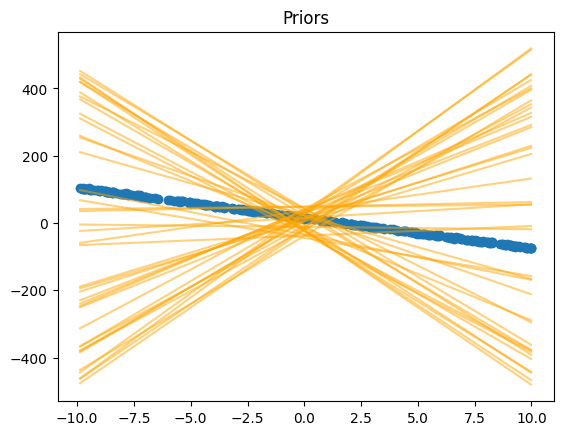

In [253]:
plt.scatter(d[:,0], y)
for mu in mu_prior_samples:
    xs = augment_d(np.array([np.linspace(np.min(d), np.max(d), 100)]).T)
    plt.plot(np.linspace(np.min(d), np.max(d), 100), xs @ mu, color="orange", alpha=0.5)
plt.title("Priors")

Text(0.5, 1.0, 'Posteriors')

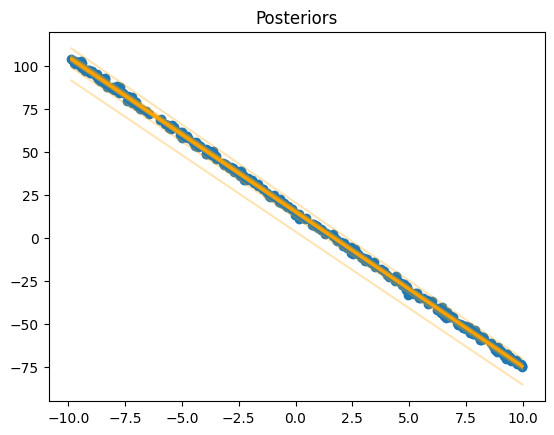

In [254]:
plt.scatter(d[:,0], y)
for mu in mus:
    xs = augment_d(np.array([np.linspace(np.min(d), np.max(d), 100)]).T)
    plt.plot(np.linspace(np.min(d), np.max(d), 100), xs @ mu, color="orange", alpha=0.3)
plt.title("Posteriors")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


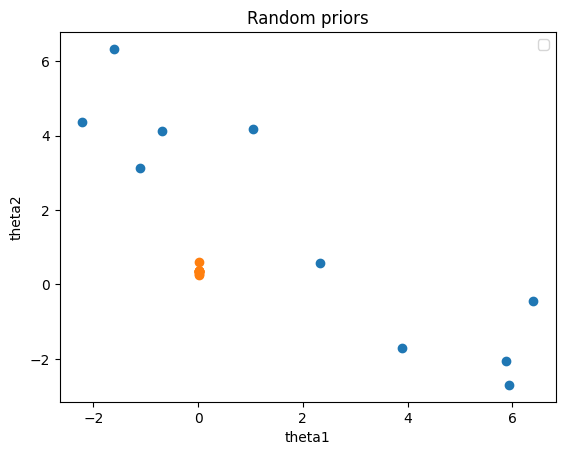

In [229]:
N = 10
cov_prior_samples = np.random.rand(N, 2, 2) @ np.eye(2)*5
covs = np.array([get_theta(augment_d(d), y, mu_prior=mu_prior, cov_prior=cov_prior)[1] for cov_prior in zip(cov_prior_samples)])

#plt.scatter([(eigen[0], eigen[1]) for eigen in np.linalg.eigen(covs)])
#for prior, posterior in zip(mu_prior_samples, mus):
#    plt.plot([prior[0], posterior[0]], [prior[1], posterior[1]], alpha=0.3)
#plt.scatter(mu_prior_samples[:, 0], mu_prior_samples[:, 1], color="blue", label="Prior mean")
#plt.scatter(mus[:, 0], mus[:, 1], color="orange", label="Posterior mean")
#plt.scatter(true_weights[0], true_weights[1], color="green", label="True weight")
eigs_prior = np.array([[np.linalg.eig(cov)[0][0], np.linalg.eig(cov)[0][1]] for cov in cov_prior_samples])
eigs_post = np.array([[np.linalg.eig(cov)[0][0][0], np.linalg.eig(cov)[0][0][1]] for cov in covs])
plt.scatter(eigs_prior[:, 0], eigs_prior[:, 1])
plt.scatter(eigs_post[:, 0], eigs_post[:, 1])
plt.xlabel("theta1")
plt.ylabel("theta2")
plt.title("Random priors")
plt.legend()

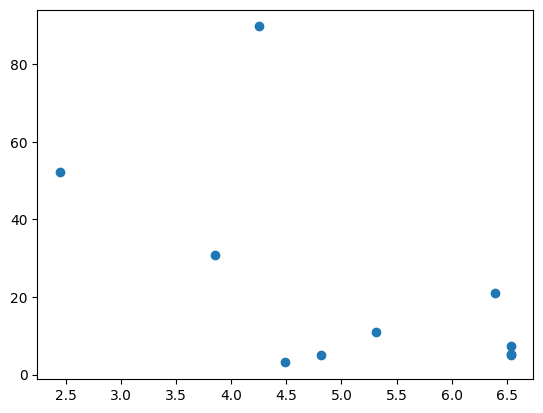

In [230]:
for i in range(100):
    l = 20
    dim = 1
    d = np.random.rand(l, dim) * 20
    noise = 5 # sigma^2_y
    def augment_d(d): # Augments dataset with an intercept column
        return np.concatenate((d.T, [np.ones(len(d))]), axis=0).T
    eps = np.random.randn(l) * noise

    true_weights = np.array([-9, 15]) # Underlying data-generating weights
    y = augment_d(d) @ true_weights + eps
    
mus = np.array([get_theta(augment_d(d), y, mu_prior=mu_prior, cov_prior=cov_prior)[0] for cov_prior in np.random.rand(N, 2, 2) @ np.eye(2)*5])
plt.scatter([np.linalg.norm(sample) for sample in cov_prior_samples], [np.linalg.norm(true_weights - mu) for mu in mus])

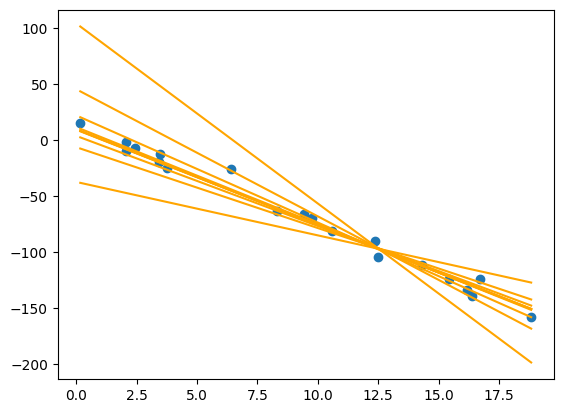

In [231]:
#mu, _ = get_theta(augment_d(d), y)
#mus = np.array([get_theta(augment_d(d), y, mu_prior=mu_prior, cov_prior=cov_prior)[0] for mu_prior in mu_prior_samples])
plt.scatter(d[:,0], y)
for mu in mus:
    xs = augment_d(np.array([np.linspace(np.min(d), np.max(d), 100)]).T)
    plt.plot(np.linspace(np.min(d), np.max(d), 100), xs @ mu, color="orange")

In [257]:
def plot_predicative(mean, cov, x, y):
    # Define the grid for the contour plot
    plt.scatter(x, y, alpha=0.7)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    x_grid, y_grid = np.mgrid[xmin:xmax, ymin:ymax]

    pos = np.empty(x_grid.shape + (2,))
    pos[:, :, 0] = x_grid
    pos[:, :, 1] = y_grid
    #print(np.dstack((x_grid, y_grid)))
    z = []

    # Create a multivariate normal distribution
    for row in np.dstack((x_grid, y_grid)):
        row_z = []
        for [x_p, y_p] in row:
            #p = np.array([x_var, y_var])
            x_p = np.array([x_p, 1])
            rv = stats.multivariate_normal(x_p.T @ mean, np.var(y) + x_p.T @ cov @ x_p)
            # Evaluate the probability density function on the grid
            row_z.append(rv.pdf(y_p))
        z.append(np.array(row_z))
    z = np.array(z).reshape(x_grid.shape)
    # Plot the scatter plot
    plt.contour(x_grid, y_grid, z)
    ones = np.ones((len(np.linspace(xmin, xmax)), 1))
    x_aug = np.concatenate((np.linspace(xmin, xmax).reshape(len(ones), 1), ones), axis=1)
    #plt.plot(np.linspace(xmin, xmax).reshape(len(ones), 1), f(x_aug, mean), c='purple', label="Mean Parameter Estimate")
    #plt.legend()
    plt.title("Posterior Predictive for $\sigma_y^2=" + str(noise) + "$")
    plt.show()

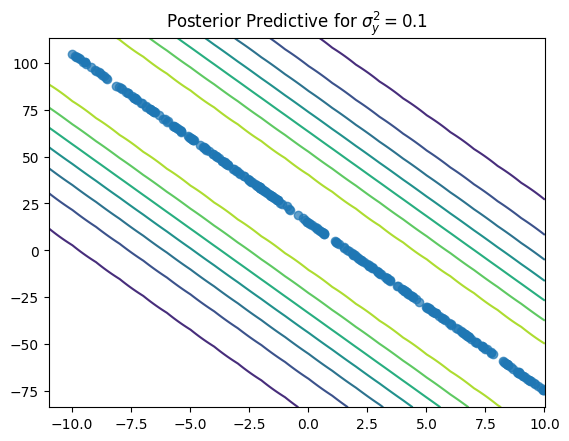

In [282]:
mu, cov = get_theta(augment_d(d), y)
plot_predicative(mu, cov, d, y)